<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: 
The first layer of a neural network. Takes in raw data (from the outside world or the output of other neurons) and feeds it into the rest of the network/Perceptron. No computations are performed in the input nodes.

### Hidden Layer:
The layer inbetween the input and output nodes and does not see anything outside of it. Computationally intensive.

### Output Layer:
The last layer of the neural network, this is where the results from a classification/regression emerge. This is the layer where the outputs/predictions are returned to.

### Neuron:
A Neuron takes the inputs and multiplies them by their weights, adds bias, sums them up, then applies the activation function to the sum to determine whether the passed information should go to the next stage. The neuron with the greatest/most signal in a layer, gets to move forward.

### Weight:
Assigns an importance value to inputs; oftentimes it's a matrix that transforms inputs to a neuron into another shape.

### Activation Function:
An activation function transforms a matrix into the desired shape for the output. Examples include sigmoid, tanh, step and relu activation functions.

### Node Map:
A visual diagram depicting the architecture of a neural network. We can think of Node Maps as flow charts showing paths between inputs and outputs.

### Perceptron:
A single layer of a neuron.

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here
Inputs > weights + bias > activation function > outputs

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [2]:
import pandas as pd
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [8]:
##### Your Code Here #####
import numpy as np

def sigmoid(x):
    ''' A function that takes 1 parameter, x, and returns the sigmoid calculation of it'''
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    ''' A function that takes 1 parameter, x, and returns the sigmoid derivative of it'''
    sx = sigmoid(x)
    return sx * (1-sx)

def perceptron(inputs, outputs, num_passes):
    ''' A function that runs a simple neural network: A Perceptron.
        Takes in inputs, outputs to search for and the number of passes to learn from.'''
    
    ''' Assigning random weights to our inputs'''
    weights = 2 * np.random.random((len(inputs.T), 1)) - 1
    
    for iteration in range(num_passes):
        ''' Calculating the dot product of the inputs times the weights '''
        weighted_sum = np.dot(inputs, weights)
    
        ''' Output the activated value for the end of 1 training epoch '''
        activated_output = sigmoid(weighted_sum)
    
        ''' Taking the difference between Output and the True values to calculate error '''
        error = outputs - activated_output
    
        ''' Gradient descent/backprop - magic!'''
        adjusted = error * sigmoid_derivative(activated_output)
    
        ''' Updating the weights after each iteration'''
        weights += np.dot(inputs.T, adjusted)
    
        print(iteration)
        # print('Weights after training: \n', weights, '\n')
        print('Outputs After the Training: \n', activated_output, '\n')
        
    return

In [9]:
inputs = np.array([
    [0,0,1],
    [1,0,1],
    [0,1,1],
    [1,1,1]
])
''' Ok, so we ran into a problem where the first output is always 0.5 and the last output is increasing although its final 
value should be 0. 
The first row of inputs are all 0s, thus the output value was never going to change from that & since the last row are all 1s,
it was never going to achieve a 0 as the final output value.
To resolve this issue, I added a third column of 1s in the inputs. Therefore introducing 'bias' to offset the multiplication issue of 0.
'''
outputs = np.array([
    [1],
    [1],
    [1],
    [0]
])

In [10]:
perceptron(inputs, outputs, 500)

0
Outputs After the Training: 
 [[0.64858511]
 [0.56484083]
 [0.48568963]
 [0.3990918 ]] 

1
Outputs After the Training: 
 [[0.69380854]
 [0.61553583]
 [0.54321261]
 [0.45659449]] 

2
Outputs After the Training: 
 [[0.7253866 ]
 [0.64637777]
 [0.58039812]
 [0.48905734]] 

3
Outputs After the Training: 
 [[0.74890522]
 [0.66577544]
 [0.60519374]
 [0.50587744]] 

4
Outputs After the Training: 
 [[0.76744379]
 [0.67841994]
 [0.62240811]
 [0.51308918]] 

5
Outputs After the Training: 
 [[0.78274336]
 [0.68695794]
 [0.63487824]
 [0.51434914]] 

6
Outputs After the Training: 
 [[0.79582993]
 [0.69294123]
 [0.64431257]
 [0.51189912]] 

7
Outputs After the Training: 
 [[0.8073321 ]
 [0.69731336]
 [0.65176771]
 [0.50714655]] 

8
Outputs After the Training: 
 [[0.81764813]
 [0.70066409]
 [0.65791208]
 [0.50099296]] 

9
Outputs After the Training: 
 [[0.82703805]
 [0.70336898]
 [0.66317569]
 [0.4940233 ]] 

10
Outputs After the Training: 
 [[0.83567664]
 [0.70566976]
 [0.66783844]
 [0.48661926]] 

## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [9]:
import pandas as pd
import numpy as np
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [10]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]

X = ...

In [11]:
##### Update this Class #####

class Perceptron():
    
    def __init__(self, input_dim=2, output_dim=1, rate=0.01, n_iter=10):
        '''
        Class Parameters
        -----------------------------------------
        Input and Output dimensions (input_dim & output_dim): Int
        Learning rate (rate): float
        Number of Iterations(n_iter):Int
        Weight (weight): random floats using Numpy
        Bias (bias): a column of 1s to offset instances where all values in a row are 0
        Loss (loss): an empty list to store the nudges as the network goes through gradient descent process.
        '''
        self.rate = rate
        self.n_iter = n_iter
        self.weight = np.random.randn(input_dim, output_dim)
        self.bias = np.ones(output_dim)
        self.loss = [ ]
        pass
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def __sigmoid_derivative(self, x):
        sx = self.__sigmoid(x)
        return sx * (1-sx)
    
    def affine_transform_forward(self, x, weight, bias):
        '''
        Will transform the input matrix by multiplying it by the weight and adding bias.
        Values will be stored in a cache to be passed to other functions within the class
        (i.e. affine_transform_backward).
        '''
        scores = x.dot(weight) + bias
        cache = (x, weight, bias)
        return scores, cache
    
    def affine_transform_backward(self, dout, cache):
        '''
        Will take derivatives for expected outputs back into the hidden layer of the network and assign
        'blame' for error. This will update the weights as the network runs iteratively to steer towards
        minimal error. Note, in a classification of NAND gates, 1s should have outputs approaching 99% (.99)
        and 0s should have outputs approaching 0% (0.00123)
        '''
        x, weight, bias = cache
        dx = dout.dot(weight.T)
        dweight = x.reshape(-1,1).dot(dout.reshape(-1,1))
        dbias = np.sum(dout, axis=0)
        return dx, dweight, dbias
    
    
    def fit(self, x, y):
        '''
        For every iteration designated as n_iter, the fit process will proceed as follows:
        1. Forward Propagation, 2. Scoring, 3. Backward Propagation and 4. Gradient Descent
        as weights and bias are iteratively 'nudged' with their derivatives and move towards
        minimum error as per Gradient Descent.
        '''

        for i in range(self.n_iter):
        
            for j in range(x.shape[0]):
            
                ''' Forward Propagation '''
                scores, cache = self.affine_transform_forward(x[j], self.weight, self.bias)
            
                ''' Scoring '''
                out = self.__sigmoid(scores)
                loss = y[j] - out.reshape(-1,)
                self.loss.append(loss)
            
                ''' Backward Propagation '''
                dout = loss * self.__sigmoid_derivative(out)
                _, dweight, dbias = self.affine_transform_backward(dout.reshape(-1,), cache)
            
                ''' Gradient Descent, iteratively updating each pass '''
                self.weight += dweight
                self.bias += dbias
            
        pass


    def predict(self, x):
        '''Return class label after unit step'''
        return self.__sigmoid(self.affine_transform_forward(x, self.weight, self.bias)[0])

In [12]:
print(diabetes.shape)
diabetes.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
X = diabetes.iloc[:, 0:8].values
y = diabetes.iloc[:, 8].values.reshape(-1,1)
X.shape, y.shape

((768, 8), (768, 1))

In [14]:
(X_train, X_test), (y_train, y_test) = (X[:615, :], X[615:, :]), (y[:615, :], y[615:, :])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((615, 8), (153, 8), (615, 1), (153, 1))

In [15]:
diabetes = Perceptron(input_dim=8, output_dim=1, n_iter=100)

In [16]:
diabetes.fit(X_train, y_train)

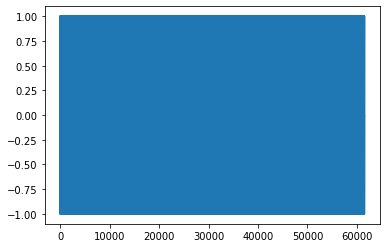

In [18]:
import matplotlib.pyplot as plt
plt.plot(diabetes.loss);

In [21]:
y_pred = diabetes.predict(X_test)
y_pred.shape

(153, 1)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, np.round(y_pred))

0.6470588235294118

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?